# Short explanation of a t test
- t test tests the likelihood of obtaining a value of t from a normal population
- t is a weighted mean in a sense. More specifically, t is the difference between two means divided by (weighted by) a standard deviation.
- There is more than 1 way to perform a t test. We will start with a single sample t test and move on to other types of t tests later.

# "Single sample" t test
- One, it should be noted that researchers working at Guinness Brewer are often credited with creating the t test while studying barley...
- $t = \frac{\bar{X}-\mu}{\bar{\sigma}}\sqrt{n}$ where
    - $\bar{X}$ is the sample mean
    - $\mu$ is a hypothesized mean
    - n is the # of measurements collected 
    - $\bar{\sigma}$ is the sample standard deviation
- And it is assumed that all data measured comes from a normal distribution.

# Problem 1: Estimate p value using a brute-force sampled distributions of t.

*This is identifcally what we did in class.*

Step 1: Generate a normally distributed population.

Let's start by ensuring we understand how to sample normally distributed data. Using random.norm from numpy, randomly sample 10,000 values from a normal distribution whose mean is 12 and standard deviation is 2. Save the values in a variable called norm_data. Plot a histogram of the collected values and then plot a density plot of the collected values. 

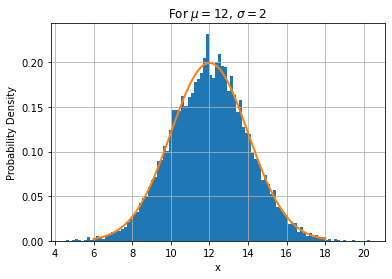

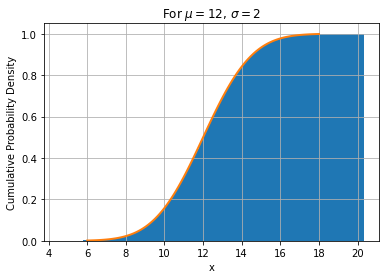

In [66]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math

mu1 = 12
sigma1 = 2

norm_data1 = np.random.normal(mu1, sigma1, 10000);
# plt.subplots();
# plt.hist(norm_data, linewidth = 30);
# plt.xlabel('x')
# plt.ylabel('Count')
# stats.norm.pdf(norm_data, mu, sigma)
# plt.show()


plt.subplots();
plt.hist(norm_data1, density = True, bins = 100);
x1 = np.linspace(mu1 - 3*sigma1, mu1 + 3*sigma1, 100);
plt.plot(x1, stats.norm.pdf(x1, mu1, sigma1), linewidth = 2 )
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title(f'For $\mu = {mu1}$, $\sigma = {sigma1}$')
plt.grid()

plt.subplots();
plt.hist(norm_data1, 1000, density = True, cumulative = 100);
plt.plot(x1, stats.norm.cdf(x1, mu1, sigma1), linewidth = 2 )
plt.xlabel('x')
plt.ylabel('Cumulative Probability Density')
plt.title(f'For $\mu = {mu1}$, $\sigma = {sigma1}$')
plt.grid()



Step 2: Use your normally distributed population to generate a "null distribution" of t values for **when n = 3.**

The idea of a null hypothesis can be tricky without some practice. To generate a null hypothesis for any statistic requires choosing representative values, in this case for the population mean $\mu$. Ultimatelty, we are asking "if I know the what my population is, then how much variation is expected in the value of t when I collect data from my defined population?" 

To do this, write a for-loop in which you collect 3 samples from your normal distribution data (norm_data) above and calculate t. Iterate through this loop 1000 times and for each iteration, calculate and save the t statistic. Plot a histogram of the collected values and then plot a density plot of the collected values.

C:\Users\advay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


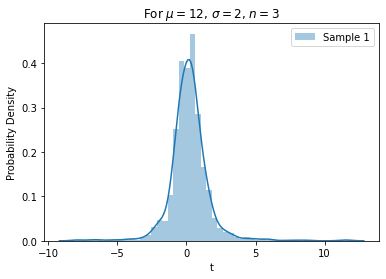

In [82]:
wavg1 = np.zeros(1000)
for m in np.arange(1000):
    tmp1 =  (norm_data1.max()-norm_data1.min())*np.random.sample(5)+norm_data1.min()
    n1 = 3
    mean = np.mean(tmp1)
    s = np.std(tmp1, ddof=0)
    t =(mean-mu1)/s*(n1)**0.5
    wavg1[m] = t
#     print(t)
    
    
# plt.hist(wavg, density = True, bins = 50)
sns.distplot(wavg1, kde=True, label='Sample 1')
plt.ylabel('Probability Density')
plt.xlabel('t')
plt.title(f'For $\mu = {mu1}$, $\sigma = {sigma1}$, $n = {n1}$')
plt.legend()
# t_crit = stats.t.ppf(q=0.95, df=13)

# p_value = 2*(1-stats.t.cdf(x=t, df=13))
# print("p-value:",p_value)


Check that distribution works correctly.

Let's ensure that we can use our distribution to estimate a p value. You take 3 random measurements and get these numbers: 9.45, 10.3, and 11. Calculate and print your t value (call it t_val) and use your t distribution to estimate the odds of obtaining a t that is less than or equal to t_val. 

Check your answer by using stats.ttest_1samp to compare your p value with a p value calculated using the stats library.

# Problem 2: Does changing the number of samples collected (n) change the t distribution?

Step 3: Repeat step 2 but collect 6 samples from your normal distributions and the calculate t for each iteration. How do the density plots compare to the answer in Problem 1? Your answer must be clear.

C:\Users\advay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


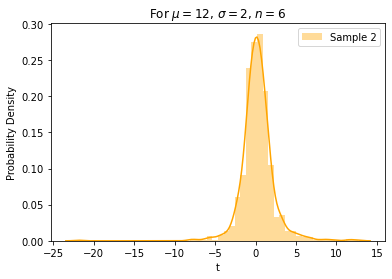

In [85]:
wavg2 = np.zeros(1000)
for m in np.arange(1000):
    tmp2 =  (norm_data1.max()-norm_data1.min())*np.random.sample(5)+norm_data1.min()
    n2 = 6
    mean = np.mean(tmp2)
    s = np.std(tmp2, ddof=0)
    t =((mean-mu1)/s)*(n2)**0.5
    wavg2[m] = t
#     print(t)
    
    
# plt.hist(wavg, density = True, bins = 50)
sns.distplot(wavg2, kde=True, label='Sample 2',color = 'orange')
plt.ylabel('Probability Density')
plt.xlabel('t')
plt.title(f'For $\mu = {mu1}$, $\sigma = {sigma1}$, $n = {n2}$')
plt.legend();
# t_crit = stats.t.ppf(q=0.95, df=13)

# p_value = 2*(1-stats.t.cdf(x=t, df=13))
# print("p-value:",p_value)


C:\Users\advay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\advay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


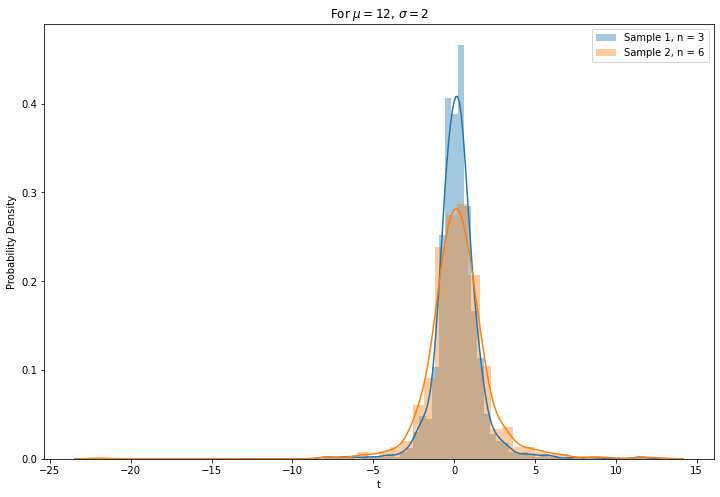

In [86]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)

sns.distplot(wavg1, kde=True, label='Sample 1, n = 3');
sns.distplot(wavg2, kde=True, label='Sample 2, n = 6');
plt.ylabel('Probability Density');
plt.xlabel('t');
plt.title(f'For $\mu = {mu1}$, $\sigma = {sigma1}$')
plt.legend();
plt.plot();

### From Problem 2, on comparing the plots, it can be seen that the plot with higher number of data points have less maximum value of Probability density, also the spread is wide which means higher variance in dataset.
### Also, the mean is almost same for the given datasets.

# Problem 3: Does changing the mean and standard deviation of the population change the t distribution?

Step 4: We will skip step 1 this time and just directly pull samples from the population using random.norm($\mu$,$\sigma$,n=3). Write a for-loop in which you collect 3 samples from a normal distribution that has a mean of 6 and a standard deviation of 3 and calculate t. Iterate through this loop 1000 times and for each iteration, calculate and save the t statistic. Plot a histogram of the collected values and then plot a density plot of the collected values. Compare the t distribution to the t distribution estimated in Problem 1 and Comment.

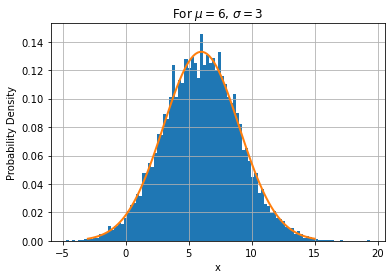

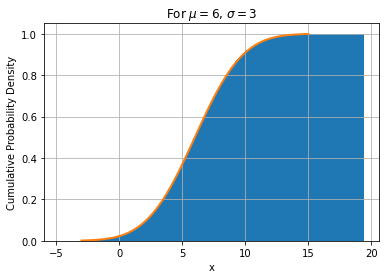

In [70]:
mu2 = 6
sigma2 = 3

norm_data2 = np.random.normal(mu2, sigma2, 10000);
# plt.subplots();
# plt.hist(norm_data, linewidth = 30);
# plt.xlabel('x')
# plt.ylabel('Count')
# stats.norm.pdf(norm_data, mu, sigma)
# plt.show()


plt.subplots();
plt.hist(norm_data2, density = True, bins = 100);
x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 100);
plt.plot(x2, stats.norm.pdf(x2, mu2, sigma2), linewidth = 2 )
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title(f'For $\mu = {mu2}$, $\sigma = {sigma2}$')
plt.grid()

plt.subplots();
plt.hist(norm_data2, 1000, density = True, cumulative = 100);
plt.plot(x2, stats.norm.cdf(x2, mu2, sigma2), linewidth = 2 )
plt.xlabel('x')
plt.ylabel('Cumulative Probability Density')
plt.title(f'For $\mu = {mu2}$, $\sigma = {sigma2}$')
plt.grid()


C:\Users\advay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


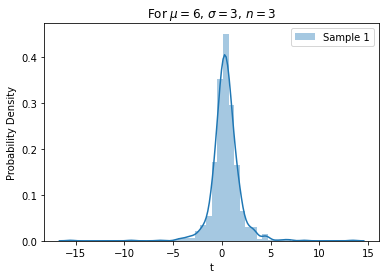

In [76]:
wavg3 = np.zeros(1000)
for m in np.arange(1000):
    tmp =  (norm_data2.max()-norm_data2.min())*np.random.sample(5)+norm_data2.min()
    n = 3
    mean = np.mean(tmp)
    s = np.std(tmp, ddof=0)
    t =(mean-mu2)/s*(n)**0.5
    wavg3[m] = t
#     print(t)
    
    
# plt.hist(wavg, density = True, bins = 50)
sns.distplot(wavg3, kde=True, label='Sample 1')
plt.ylabel('Probability Density')
plt.xlabel('t')
plt.title(f'For $\mu = {mu2}$, $\sigma = {sigma2}$, $n = {n}$')
plt.legend();
# t_crit = stats.t.ppf(q=0.95, df=13)

# p_value = 2*(1-stats.t.cdf(x=t, df=13))
# print("p-value:",p_value)


C:\Users\advay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\advay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


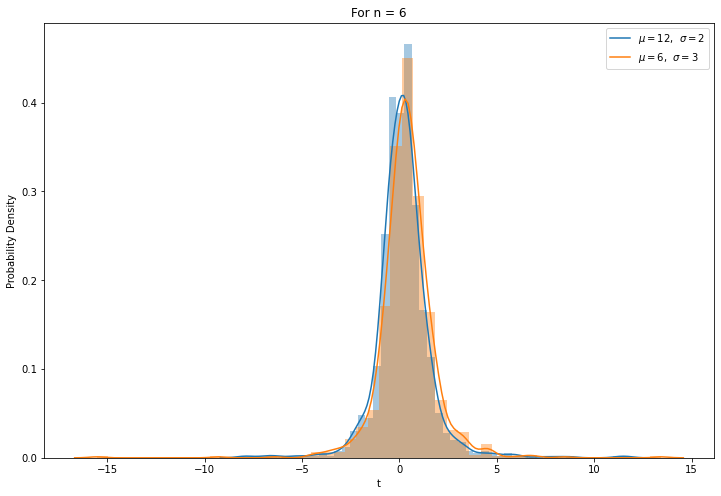

In [87]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)

sns.distplot(wavg1, kde=True)
sns.distplot(wavg3, kde=True)
plt.ylabel('Probability Density')
plt.xlabel('t')
plt.title(f'For n = {n}')
plt.legend([r'$\mu = 12$,  $\sigma = 2$',r'$\mu = 6$,  $\sigma = 3$'])

### From problem 3, we see even if the mean and standard deviation are different, the t-distribution is almost similar for the the same number of data point.

# Our takeways 

- t is used to determine the likelihood of obtaining a value of t with n measurements sampled from a normal distribution.
    - Interesting, the effect of n and the choice of $\mu$ and $\sigma$: **YOU COMMENT HERE :-)**
- Note we have only covered the "single sample" t test here. A more commonly used t test is the two sample, which we'll cover next.